In [17]:
# to run in google colab
import sys

if "google.colab" in sys.modules:
    import subprocess

    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_03_edge_detection/ex3/butterfly_noisy.jpg".split()
    )




In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

figsize = (10, 10)




In [19]:
import numpy as np

def bilateral_one_pixel(source, x, y, d, sigma_r, sigma_s):
    # === init vars
    filtered_pix = 0
    Wp = 0

    # TODO: 1. run on all neighbors (~3 lines)
    for i in range(x - d, x + d + 1):
        for j in range(y - d, y + d + 1):
            # TODO: 2. if neighbor out of matrix indices - don't count him in your computation (~2 lines)
            if i < 0 or i >= source.shape[0] or j < 0 or j >= source.shape[1]:
                continue

            # TODO: 3. find filtered_pix (~6 lines)
            spatial_diff = np.sqrt((x - i)**2 + (y - j)**2)
            intensity_diff = np.abs(source[x, y] - source[i, j])
            weight = np.exp(-(spatial_diff**2) / (2 * sigma_s**2) - (intensity_diff**2) / (2 * sigma_r**2))
            filtered_pix += weight * source[i, j]
            Wp += weight

    filtered_pix /= Wp

    # make result uint8
    filtered_pix = np.clip(filtered_pix, 0, 255).astype(np.uint8)
    return filtered_pix


In [20]:
def bilateral_filter(source, d, sigma_r, sigma_s):
    # build empty filtered_image
    filtered_image = np.zeros(source.shape, np.uint8)
    # make input float
    source = source.astype(float)
    # d must be odd!
    assert d % 2 == 1, "d input must be odd"

    height, width = source.shape

    for i in range(height):
        for j in range(width):
            # TODO: run on all pixels with bilateral_one_pixel(...) (~4 lines)
            filtered_image[i, j] = bilateral_one_pixel(source, i, j, d, sigma_r, sigma_s)

    return filtered_image

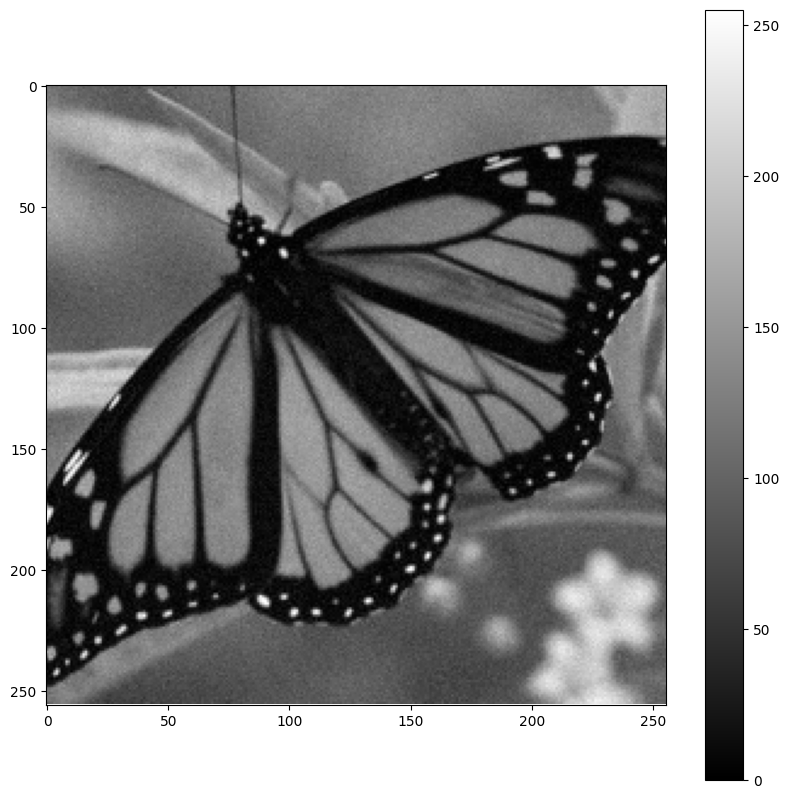

In [21]:
# upload noisy image
src = cv2.imread("butterfly_noisy.jpg")
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))
plt.imshow(src, cmap="gray", vmin=0, vmax=255)
plt.colorbar()
plt.show()



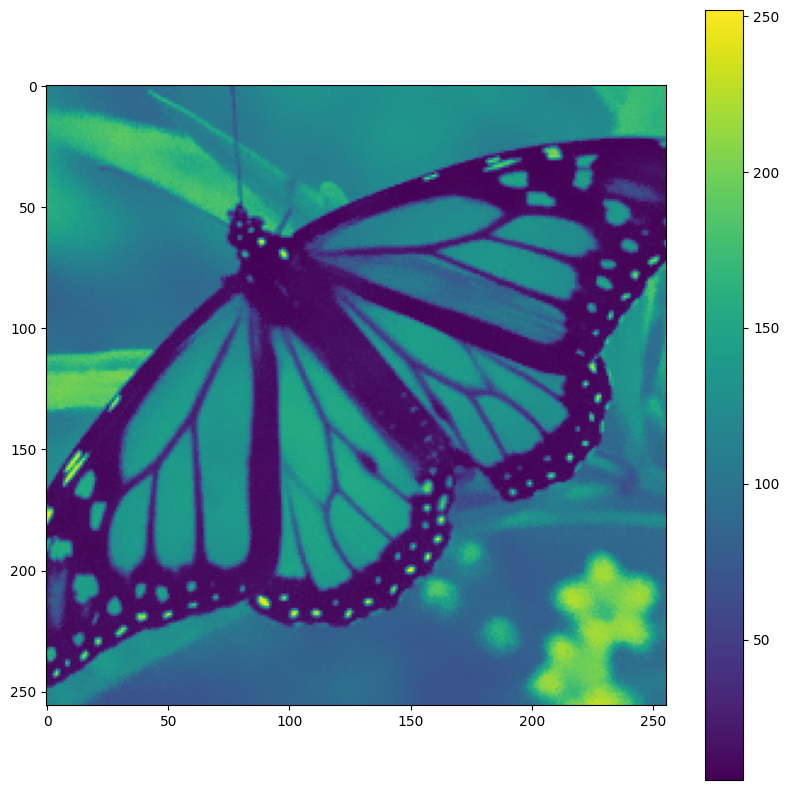

In [22]:
# ======== run
d = 5  # edge size of neighborhood perimeter
sigma_r = 12  # sigma range
sigma_s = 16  # sigma spatial

my_bilateral_filtered_image = bilateral_filter(src, d, sigma_r, sigma_s)

plt.figure(figsize=(10, 10))
plt.imshow(my_bilateral_filtered_image)
plt.colorbar()
plt.show()



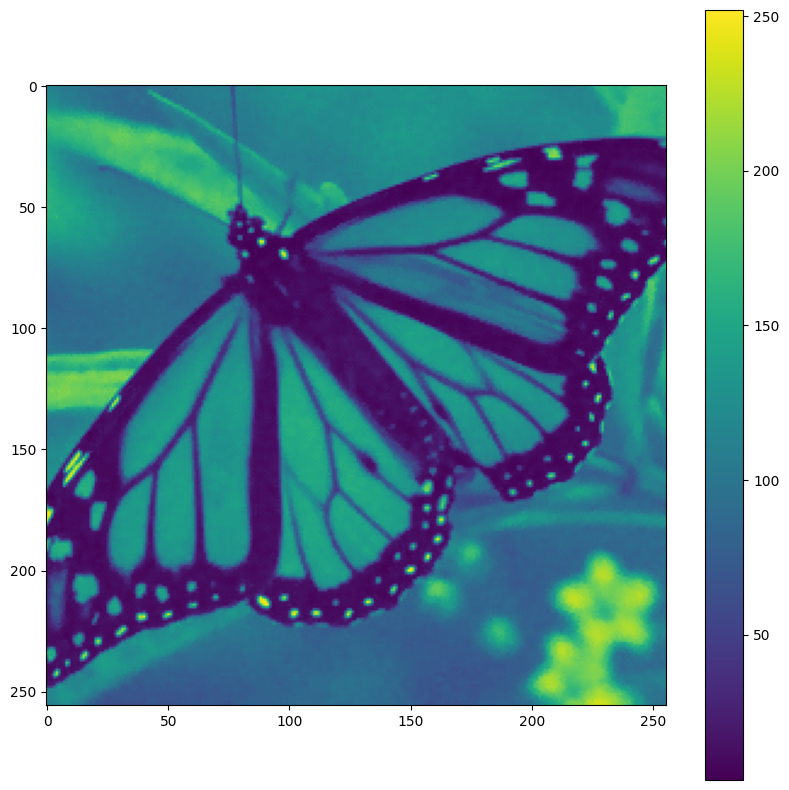

In [23]:
# compare to opencv
cv2_bilateral_filtered_image = cv2.bilateralFilter(src, d, sigma_r, sigma_s)

plt.figure(figsize=(10, 10))
plt.imshow(cv2_bilateral_filtered_image)
plt.colorbar()
plt.show()



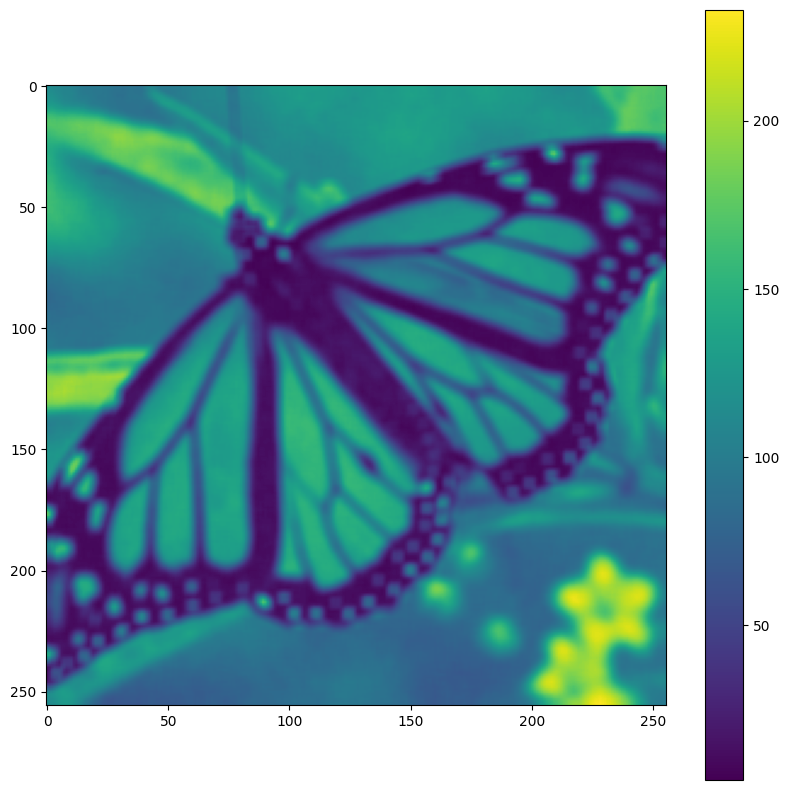

In [24]:
# compare to regular gaussian blur
gaussian_filtered_image = cv2.GaussianBlur(src, (d, d), sigma_s)
plt.figure(figsize=(10, 10))
plt.imshow(gaussian_filtered_image)
plt.colorbar()
plt.show()



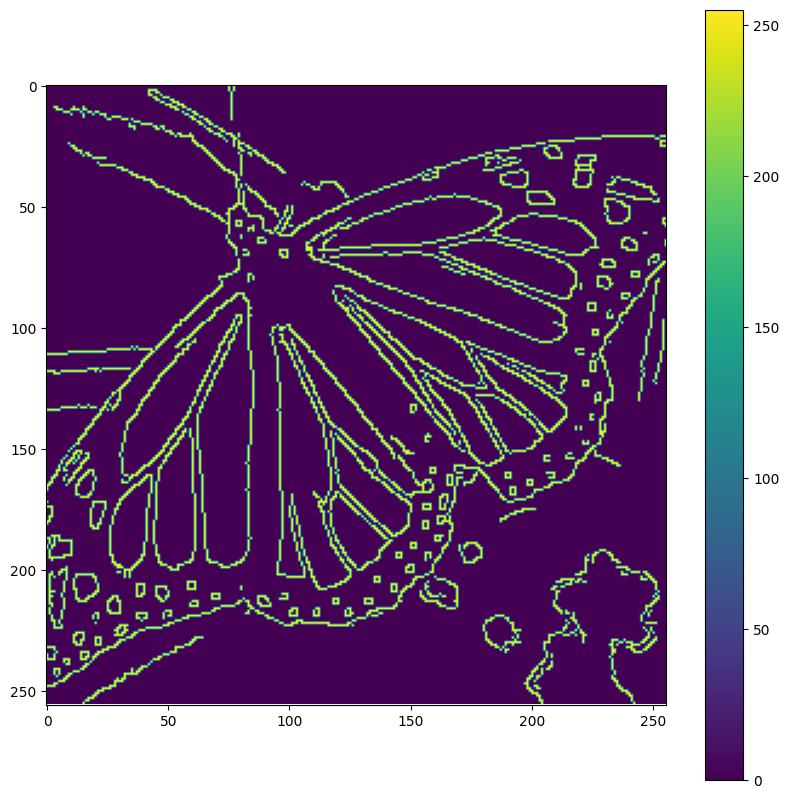

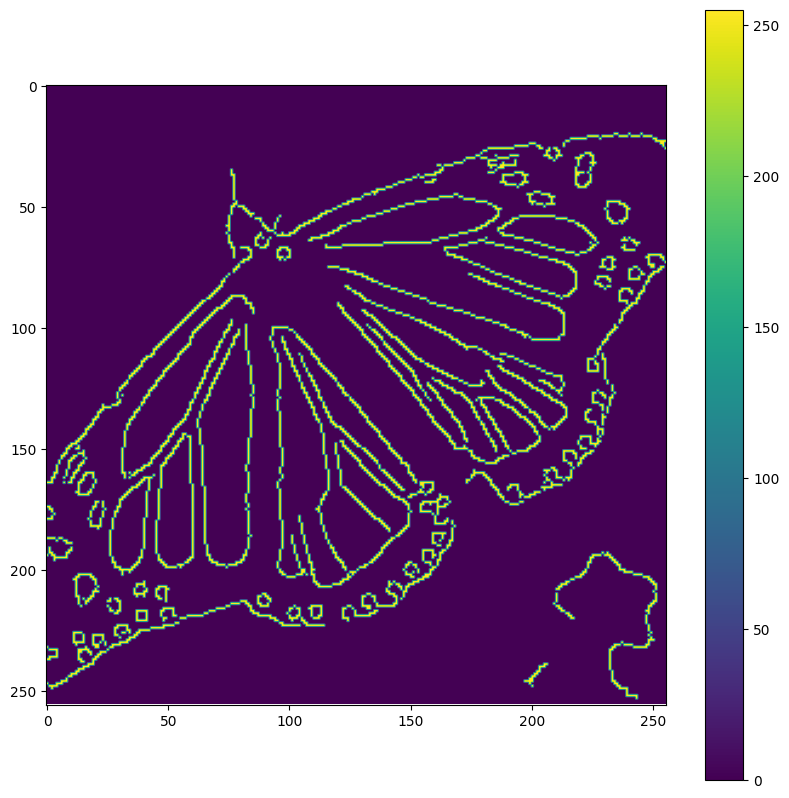

In [27]:
# copare canny results between regular  two images
th_low = 100
th_high = 200
res = cv2.Canny(my_bilateral_filtered_image, th_low, th_high)
plt.figure(figsize=(10, 10))
plt.imshow(res)
plt.colorbar()
plt.show()

res = cv2.Canny(gaussian_filtered_image, th_low, th_high)
plt.figure(figsize=(10, 10))
plt.imshow(res)
plt.colorbar()
plt.show()


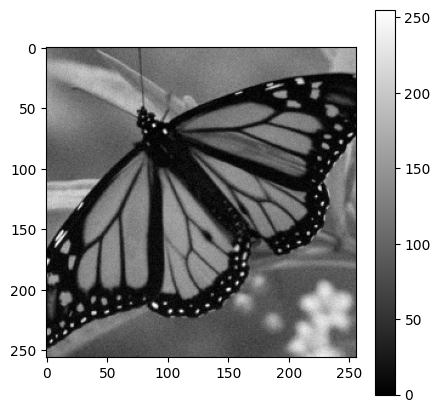

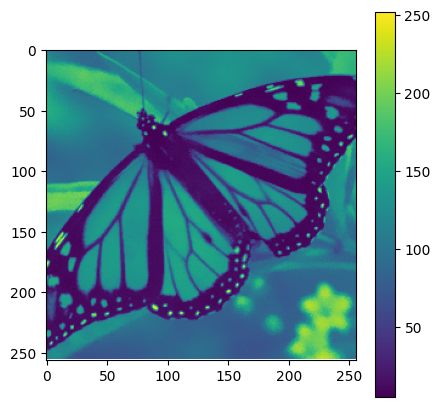

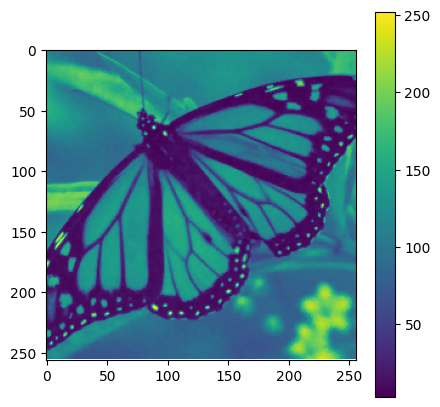

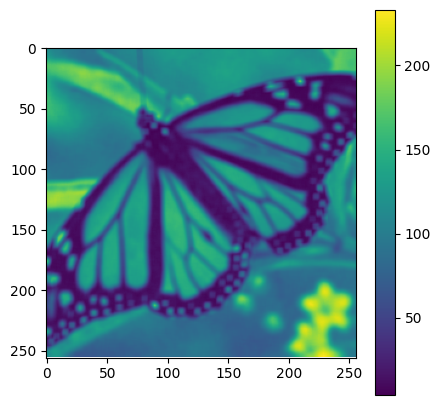

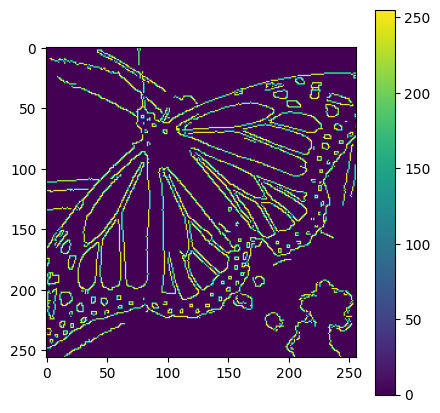

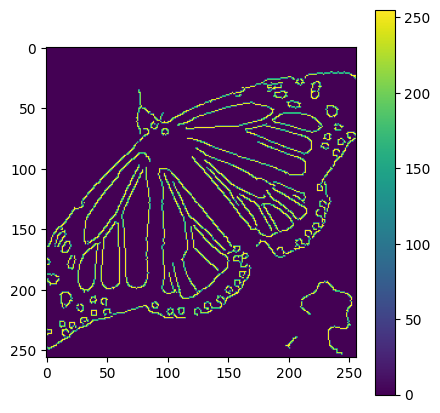

In [29]:
#print all

#src noisy img
plt.figure(figsize=(5, 5))
plt.imshow(src, cmap="gray", vmin=0, vmax=255)
plt.colorbar()
plt.show()

#my bilateral filtered image
plt.figure(figsize=(5, 5))
plt.imshow(my_bilateral_filtered_image)
plt.colorbar()
plt.show()

#cv2 bilateral filtered image
plt.figure(figsize=(5, 5))
plt.imshow(cv2_bilateral_filtered_image)
plt.colorbar()
plt.show()

#gauusian
plt.figure(figsize=(5, 5))
plt.imshow(gaussian_filtered_image)
plt.colorbar()
plt.show()

# copare canny results between regular  two images
th_low = 100
th_high = 200
res = cv2.Canny(my_bilateral_filtered_image, th_low, th_high)
plt.figure(figsize=(5, 5))
plt.imshow(res)
plt.colorbar()
plt.show()

res = cv2.Canny(gaussian_filtered_image, th_low, th_high)
plt.figure(figsize=(5, 5))
plt.imshow(res)
plt.colorbar()
plt.show()


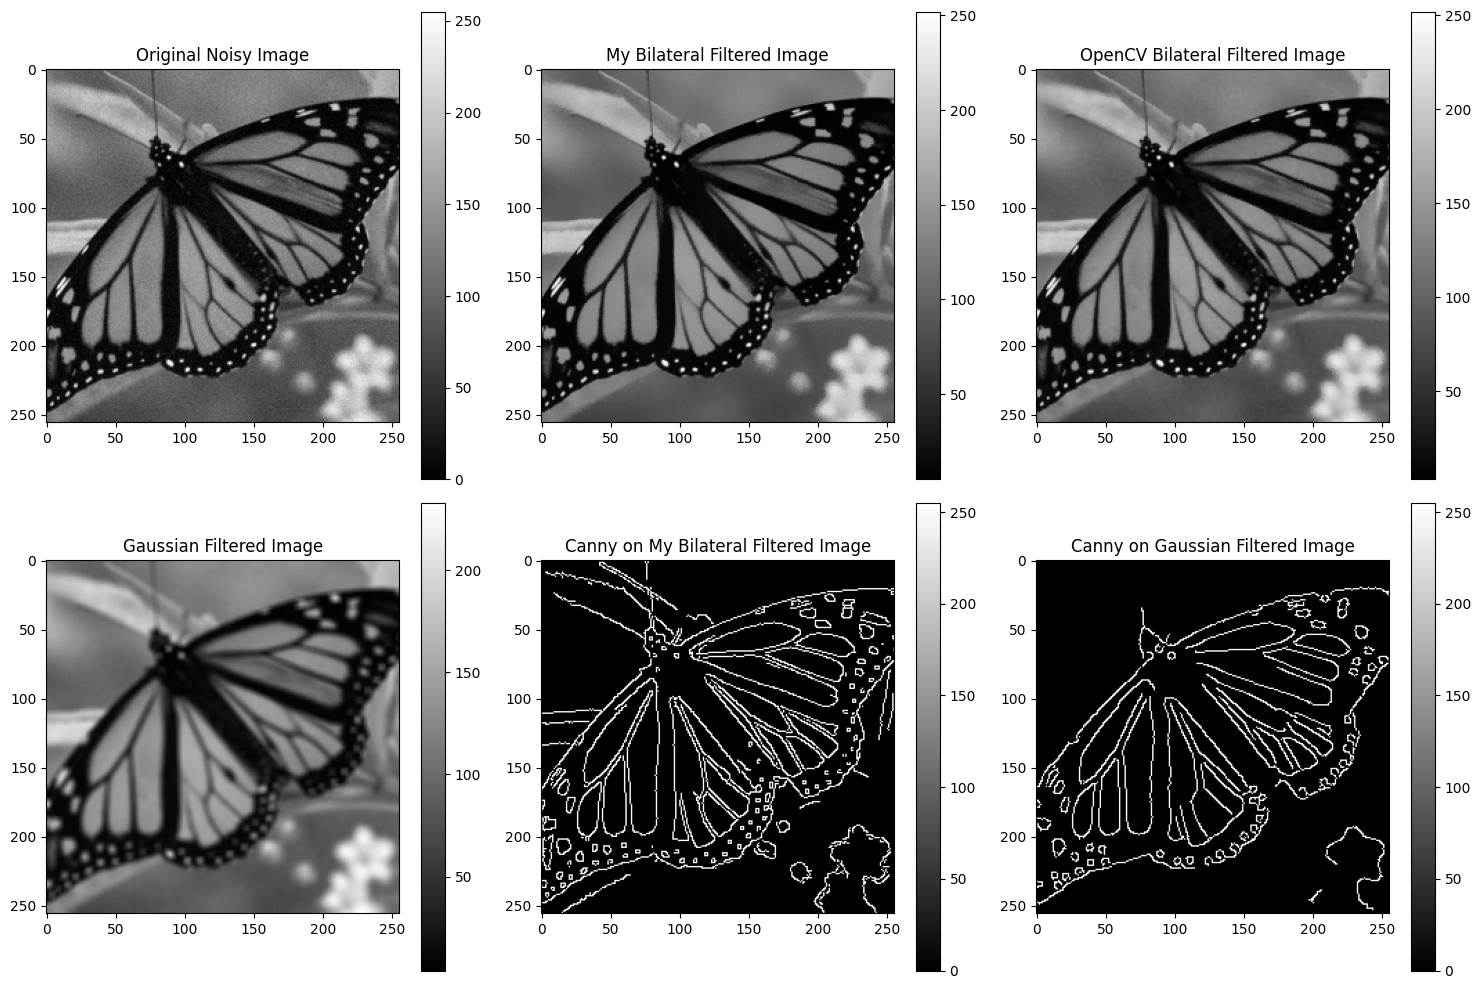

In [32]:
# Display all images in a grid
plt.figure(figsize=(15, 10))

# Original Noisy Image
plt.subplot(2, 3, 1)
plt.imshow(src, cmap="gray", vmin=0, vmax=255)
plt.colorbar()
plt.title('Original Noisy Image')

# My Bilateral Filtered Image
plt.subplot(2, 3, 2)
plt.imshow(my_bilateral_filtered_image, cmap="gray")
plt.colorbar()
plt.title('My Bilateral Filtered Image')

# OpenCV Bilateral Filtered Image
plt.subplot(2, 3, 3)
plt.imshow(cv2_bilateral_filtered_image, cmap="gray")
plt.colorbar()
plt.title('OpenCV Bilateral Filtered Image')

# Gaussian Filtered Image
plt.subplot(2, 3, 4)
plt.imshow(gaussian_filtered_image, cmap="gray")
plt.colorbar()
plt.title('Gaussian Filtered Image')

# Canny on My Bilateral Filtered Image
plt.subplot(2, 3, 5)
canny_my_bilateral = cv2.Canny(my_bilateral_filtered_image, th_low, th_high)
plt.imshow(canny_my_bilateral, cmap="gray")
plt.colorbar()
plt.title('Canny on My Bilateral Filtered Image')

# Canny on Gaussian Filtered Image
plt.subplot(2, 3, 6)
canny_gaussian = cv2.Canny(gaussian_filtered_image, th_low, th_high)
plt.imshow(canny_gaussian, cmap="gray")
plt.colorbar()
plt.title('Canny on Gaussian Filtered Image')

plt.tight_layout()
plt.show()